In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [276]:
#Read the income return on the type of degree CSV
Degrees_Payback = pd.read_csv('degrees-that-pay-back.csv')
Degree_df = pd.DataFrame(Degrees_Payback)

#Ready the salary averages based on college type
Salary_By_College = pd.read_csv('salaries-by-college-type.csv')
College_Salary_df = pd.DataFrame(Salary_By_College)

#Read the income based upon region
Salary_By_Region = pd.read_csv('salaries-by-region.csv')
Region_Salary_df = pd.DataFrame(Salary_By_Region)



In [277]:
Region_Salary_df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [278]:
#Check for duplicate rows and create a column for duplicate Rows in DF (There were non)
Region_Salary_df["Is_Duplicated"]= Region_Salary_df.duplicated()
Region_Salary_df.head()

#Removing Duplicate Rows if there were any
#Region_Salary_df = Region_Salary_df.drop_duplicates()
#Region_Salary_df

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Is_Duplicated
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00",False
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,False
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,False
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00",False
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN,False


In [279]:
#Rename the columns
Region_Salary_df.columns = ['School Name', 'Region', 'Starting_Mid', 'Mid_Sal', 'Mid_10th', 'Mid_25th', 'Mid_75th', 'Mid_90th','Is_Duplicated']
Region_Salary_df.head()



,School Name,Region,Starting_Mid,Mid_Sal,Mid_10th,Mid_25th,Mid_75th,Mid_90th,Is_Duplicated
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00",False
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,False
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,False
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00",False
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN,False


In [280]:
#Create list for loop
Dollar_Cols = ['Starting_Mid', 'Mid_Sal', 'Mid_10th', 'Mid_25th', 'Mid_75th', 'Mid_90th']

#Loop through DF and convert columns with Dollar $ign (objects) to numeric values (integer)
for x in Dollar_Cols:
    Region_Salary_df[x] = Region_Salary_df[x].str.replace("$","")
    Region_Salary_df[x] = Region_Salary_df[x].str.replace(",","")
    Region_Salary_df[x] = pd.to_numeric(Region_Salary_df[x])

Region_Salary_df.head()

,School Name,Region,Starting_Mid,Mid_Sal,Mid_10th,Mid_25th,Mid_75th,Mid_90th,Is_Duplicated
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,False
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,False
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,False
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,False
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN,False


In [281]:
#Sort DF by Regions with the Highest to lowest 'Starting_Mid' Salaries
Region_Sort = Region_Salary_df.sort_values(['Region', 'Starting_Mid'], ascending=[True, False])
Region_Sort.head()

,School Name,Region,Starting_Mid,Mid_Sal,Mid_10th,Mid_25th,Mid_75th,Mid_90th,Is_Duplicated
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,False
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,False
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,False
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,False
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0,False


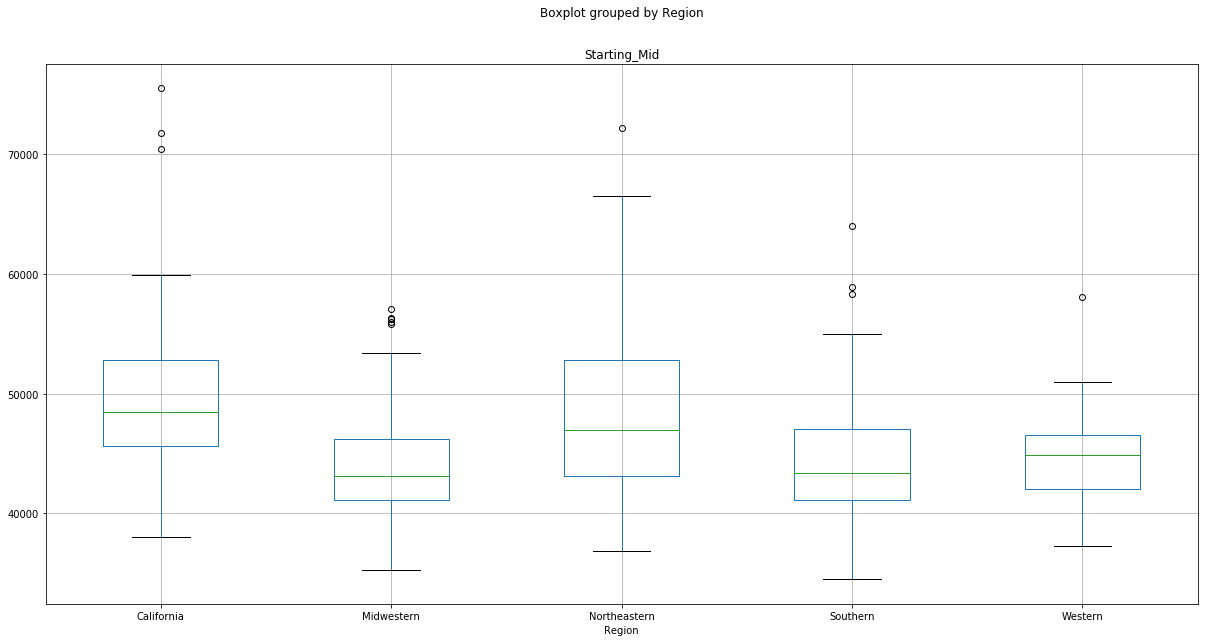

In [282]:
# Create a boxplot to compare means Starting Salary
Region_Sort.boxplot("Starting_Mid", by="Region", figsize=(20, 10))

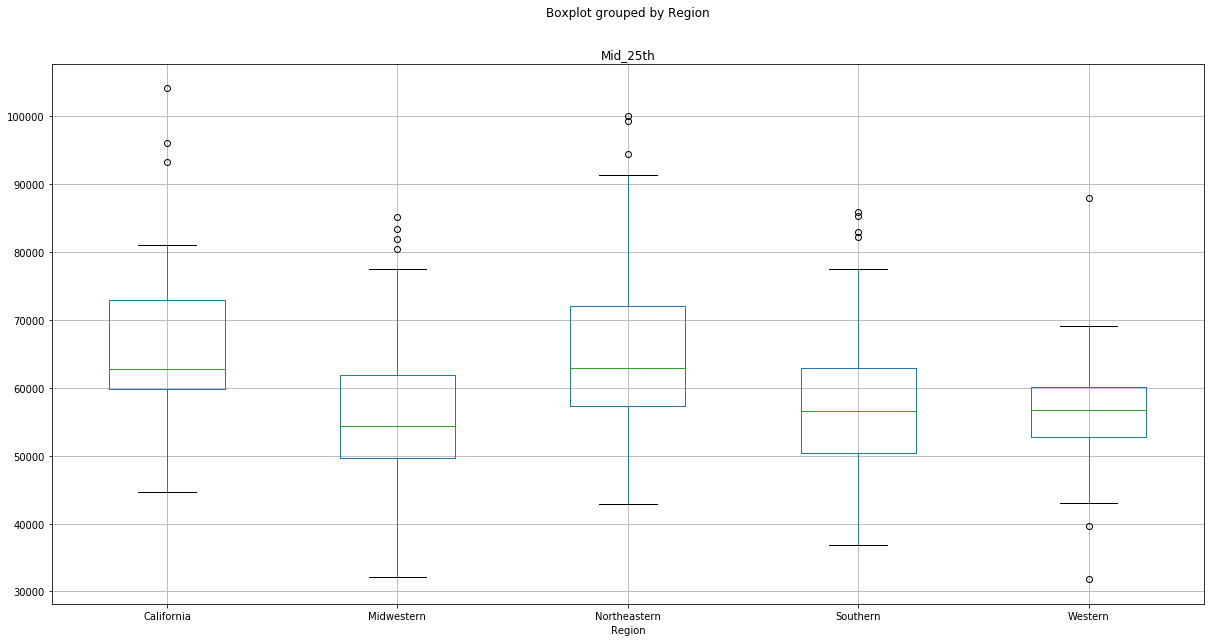

In [283]:
# Create a boxplot to compare means Mid_25th Salary
Region_Sort.boxplot("Mid_25th", by="Region", figsize=(20, 10))

TypeError: 'int' object is not callable

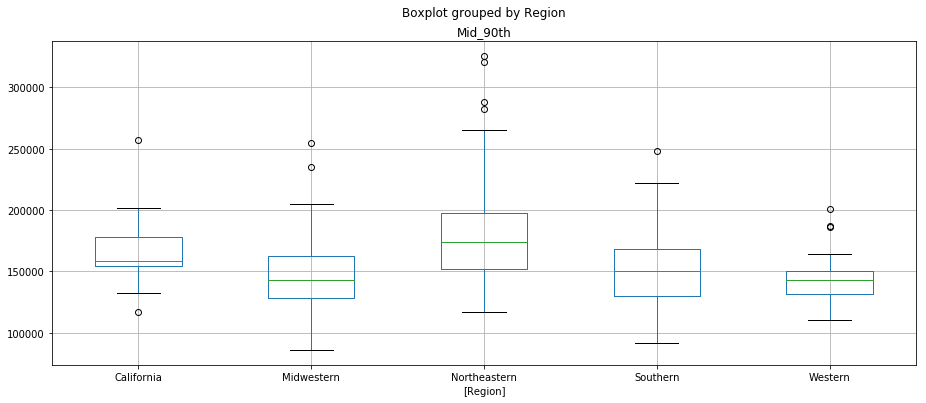

In [288]:
# Create a boxplot to compare means Mid_90th Salary
Region_Sort.boxplot(by=["Region"], column=["Mid_90th"], figsize=(15,6))

# set your own proper title
plt.title('Mid 90th Salary')

# get rid of the automatic'Boxplot title
plt.suptitle("")

# Display box chart
plt.show()


In [ ]:
#Extract data by Region from the Master DF
Cali_Region = Region_Salary_df.loc[Region_Salary_df["Region"] == "California", :]
Cali_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Cali_Sort = Cali_Region.sort_values(['Starting_Mid', 'School Name'], ascending=[False, True])
Cali_Sort.head()


In [ ]:
#Give a description of the salary data by region.
Cali_Region.describe()

In [ ]:
Western_Region = Region_Salary_df.loc[Region_Salary_df["Region"] == "Western", :]
Western_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Western_Sort = Western_Region.sort_values(['Starting_Mid', 'School Name'], ascending=[False, True])
Western_Sort.head()


In [ ]:
Western_Sort.describe()

In [ ]:
#Extract data by Region from the Master DF
Northeastern_Region = Region_Salary_df.loc[Region_Salary_df["Region"] == "Northeastern", :]
Northeastern_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Northeastern_Sort = Northeastern_Region.sort_values(['Starting_Mid', 'School Name'], ascending=[False, True])
Northeastern_Sort.head()


In [ ]:
Northeastern_Sort.describe()

In [ ]:
#Extract data by Region from the Master DF
Midwestern_Region = Region_Salary_df.loc[Region_Salary_df["Region"] == "Midwestern", :]
Midwestern_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Midwestern_Sort = Midwestern_Region.sort_values(['Starting_Mid', 'School Name'], ascending=[False, True])
Midwestern_Sort.head()


In [ ]:
Midwestern_Sort.describe()

In [ ]:
#Extract data by Region from the Master DF
Southern_Region = Region_Salary_df.loc[Region_Salary_df["Region"] == "Southern", :]
Southern_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Southern_Sort = Southern_Region.sort_values(['Starting_Mid', 'School Name'], ascending=[False, True])
Southern_Sort.head()


In [ ]:
Southern_Sort.describe()

In [ ]:
#Find the mean for each period of Salary change and groupby the Region names
Region_df = Region_Sort.groupby('Region', as_index=False)['Starting_Mid','Mid_Sal','Mid_10th', 'Mid_25th', 'Mid_75th', 'Mid_90th'].mean()
Region_df


In [ ]:
# Find the number of schools in each Region
School_Count_by_Region = Region_Salary_df['Region'].value_counts()
School_Count_by_Region

In [ ]:
# Use DataFrame.plot() in order to create a bar chart of the data
School_Count_by_Region.plot(kind="bar", fontsize=20, figsize=(12,6))

# Set a title for the chart
plt.title("Number of Schools by Region", fontsize=35)
plt.show()


In [ ]:
#Create new DF that Sorts Region_df by Hightest to Lowest 'Starting_Mid'
Region_by_Start_Mid = Region_df.sort_values('Starting_Mid', ascending=False)
Region_by_Start_Mid

In [ ]:
#Create new DF that Sorts Region_df by Hightest to Lowest 'Mid_75th'
Region_by_Mid = Region_df.sort_values('Mid_75th', ascending=False)
Region_by_Mid

In [ ]:
#Create new DF that Sorts Region_df by Hightest to Lowest 'Mid_90th'
Region_by_Mid_Late = Region_df.sort_values('Mid_90th', ascending=False)
Region_by_Mid_Late